# Bangalore House Price Prediction - Supervised Regression Problem

## Data Preprocessing

# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#  Load dataset 

In [3]:
df_raw = pd.read_csv(r"C:\Users\india\Desktop\Projects\ML Projects\Bengaluru_House_Data\Bengaluru_House_Data.csv")
df_raw.shape

(13320, 9)

In [4]:
df_raw.head(30)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


In [5]:
df_raw.tail(20)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13300,Plot Area,Ready To Move,Hosakerehalli,5 Bedroom,NaN,1500,6.0,2.0,145.00
13301,Super built-up Area,Ready To Move,Kothanur,3 BHK,NaN,1454,3.0,3.0,71.50
13302,Super built-up Area,Ready To Move,Annaiah Reddy Layout,2 BHK,NaN,1075,2.0,2.0,48.00
13303,Plot Area,Ready To Move,Vidyaranyapura,5 Bedroom,NaN,774,5.0,3.0,70.00
13304,Super built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,GrrvaGr,1187,2.0,2.0,40.14
13305,Carpet Area,Ready To Move,Hulimavu,1 BHK,NaN,500,1.0,3.0,220.00
13306,Plot Area,Ready To Move,Rajarajeshwari Nagara,4 Bedroom,NaN,1200,5.0,NaN,325.00
13307,Built-up Area,Ready To Move,Billekahalli,3 BHK,NaN,1805,3.0,3.0,134.00
13308,Built-up Area,Ready To Move,Bannerghatta Road,3 BHK,Baanise,1527,3.0,1.0,142.00
13309,Super built-up Area,Ready To Move,Yeshwanthpur,3 BHK,IBityin,1675,3.0,NaN,92.13


## 3. Exploratory Data Analysis

In [6]:
df = df_raw.copy() # get the copy of raw data

In [7]:
# get the information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 624.4+ KB


In [8]:
# We have only 3 neumerical features - bath, balcony and price
# 6 categorical features - area type, availability, size, society, and total_srft
# Target Feature =======>>>>>> price >>>>>>
# Price in lakh

In [9]:
df.describe()
#observe 75% and max value it shows huge diff

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


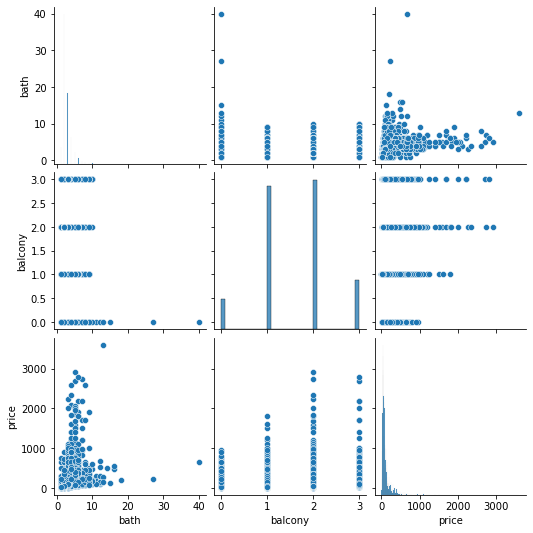

In [10]:
sns.pairplot(df)

# bath and price have slightly linear correlation with some outliers

In [11]:
df.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


In [12]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [13]:
df['availability'].value_counts()

Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
16-Jul               1
16-Nov               1
15-Dec               1
14-Nov               1
16-Jan               1
Name: availability, Length: 81, dtype: int64

In [14]:
# value count of each feature
def value_count(df):
  for var in df.columns:
    print(df[var].value_counts())
    print("--------------------------------")

In [15]:
value_count(df)

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64
--------------------------------
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
16-Jul               1
16-Nov               1
15-Dec               1
14-Nov               1
16-Jan               1
Name: availability, Length: 81, dtype: int64
--------------------------------
Whitefield                               540
Sarjapur  Road                           399
Electronic City                          302
Kanakpura Road                           273
Thanisandra                              234
                                        ... 
Kanakapura  Rod                            1
Sree Narayana Nagar                        1
Mailasandra                                1
Bidere Agarahara, Behind Safal market      1
Thavarekere                             

<AxesSubplot:>

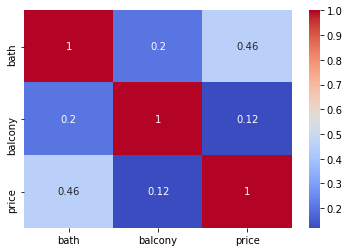

In [16]:
# correlation heatmap
num_vars = ["bath", "balcony", "price"]
sns.heatmap(df[num_vars].corr(),cmap="coolwarm", annot=True)

# correlation of bath is greater than a balcony with price

# 4. Preare Data for Machine Learning Model

## Data cleaning

In [17]:
df.isnull().sum() # find the homuch missing data available

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [18]:
df.isnull().mean()*100 # % of measing value

#society has 41.3% missing value (need to drop)

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

<AxesSubplot:>

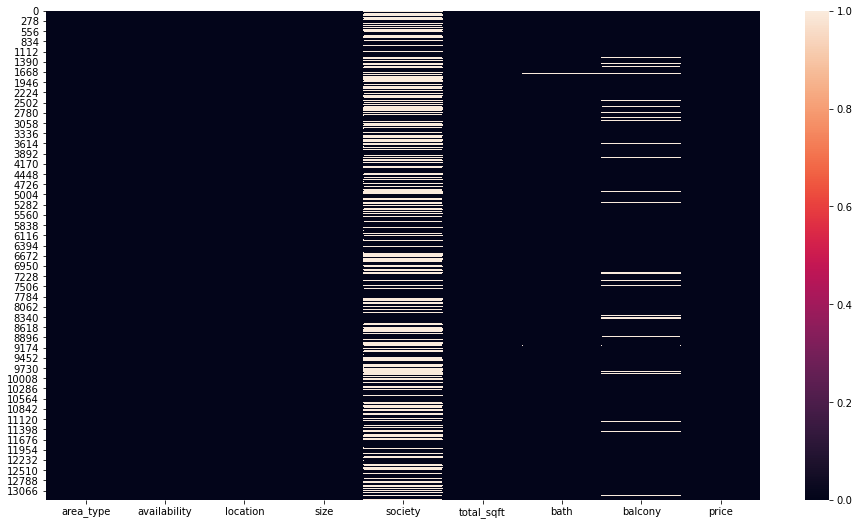

In [19]:
# visualize missing value using heatmap to get idea where is the value missing

plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())

In [20]:
# Drop ----------> society feature
# because 41.3% missing value
df2 = df.drop('society', axis='columns')
df2.shape

(13320, 8)

In [21]:
# fill mean value in --------> balcony feature
# because it contain 4.5% missing value
df2['balcony'] = df2['balcony'].fillna(df2['balcony'].mean())
df2.isnull().sum()

area_type        0
availability     0
location         1
size            16
total_sqft       0
bath            73
balcony          0
price            0
dtype: int64

In [22]:
# drop na value rows from df2
# because there is very less % value missing
df3 = df2.dropna()
df3.shape

(13246, 8)

In [23]:
df3.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [24]:
df3.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


## Feature Engineering

In [25]:
# to show all th ecolumns and rows
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

### Converting 'total_sqft' cat feature in numeric

In [26]:
df3['total_sqft'].value_counts()

# here we observe that 'total_sqft' contain string value in diff format
#float, int like value 1689.28,817 
# range value: 540 - 740 
# number and string: 142.84Sq. Meter, 117Sq. Yards, 1Grounds

# best strategy is to convert it into number by spliting it

1200                 843
1100                 221
1500                 204
2400                 195
600                  180
1000                 172
1350                 132
1050                 123
1300                 117
1250                 114
900                  112
1400                 108
1800                 104
1150                 101
1600                 100
1140                  91
2000                  82
1450                  70
1650                  69
800                   67
1075                  66
3000                  66
1020                  63
2500                  62
1125                  60
1550                  60
1160                  60
950                   59
1700                  58
1180                  58
1260                  57
1255                  56
1080                  55
1220                  55
1070                  53
700                   52
750                   52
1225                  48
1175                  48
4000                  48
